# intro

The purpose of this file will be to try and create the M term for the Lind section and understand it.

We will take a gateway, a section, etc. Maybe a latitude or longitude. We can calculate the M across that section. I think this is dependent upon the velocity across the section

# load the packages and the grid to run

In [1]:
# import packages and functions
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc
import gsw
import sys

In [2]:
sys.path.append("/home/mmurakami/crios_backups/an_helper_functions")

from get_Jterms import *

(50,) (50, 1350, 270)
hf1 (1350, 270)
(1, 1350, 270)
LwetC2d 146614
LwetC 4833023



In [3]:
# let's do this exercise for the Barents Sea Lind mask
mymsk = np.load('/home/mmurakami/crios_backups/ASTE_270/Pemberton_BarentsSpaper/Lind2018/mask_Lind.npz')
mymsk = mymsk['msk1']

In [4]:
# also set the xlims and ylims for the given mask
xlims = np.array([420,530])
ylims = np.array([420,560])

# xlims = np.array([430,470])
# ylims = np.array([480,510])

In [5]:
hfC = mygrid['hFacC']
hfC0 = hfC[0]

# Create a copy to modify
hfC_modified = hfC.copy()
hfC0_copy = np.full((ny, nx), np.nan)
hfC0_copy[np.isnan(hfC0)] = 1

# Modify only the copied version
hfC_modified[0] = hfC0_copy

# # Plot the modified version
# plt.pcolormesh(get_aste_tracer(hfC_modified, nfx, nfy)[0])
# plt.colorbar()
# plt.show()

(420.0, 560.0)

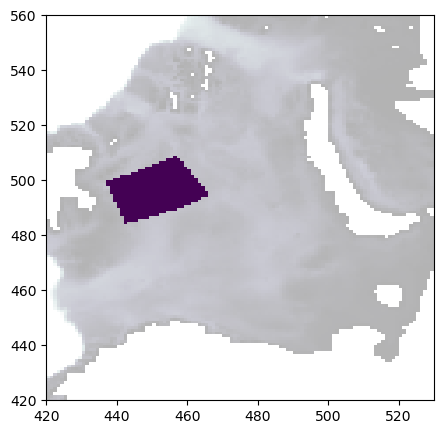

In [6]:
fig = plt.figure(figsize = (5,5))
plt.pcolormesh(get_aste_tracer(mygrid['Depth'],nfx,nfy)[0],cmap="bone",alpha=0.3,vmin=0,vmax=1000)
plt.pcolormesh(get_aste_tracer(hfC_modified,nfx,nfy)[0],cmap="bone_r")
plt.pcolormesh(get_aste_tracer(mymsk,nfx,nfy)[0])
plt.xlim(xlims)
plt.ylim(ylims)

In [7]:
# maybe we should make this a square just to be easier to calculate with U and V

In [8]:
# create the mask based on lat long
lon = mygrid['XC']
lat = mygrid['YC']
mask = np.zeros_like(lat)
mask[(lat >= 76.25) & (lat <= 78.5) & (lon >= 27) & (lon <= 41)] = 1  # Masked region
mask[mask == 0 ] = np.nan

In [9]:
# Using np.where to get indices where the mask equals 1
rows, cols = np.where(mask == 1)

# Get the extreme indices in each dimension
min_row, max_row = rows.min(), rows.max()
min_col, max_col = cols.min(), cols.max()

print("Bottom edge (min row index):", min_row)
print("Top edge (max row index):", max_row)
print("Left edge (min col index):", min_col)
print("Right edge (max col index):", max_col)

Bottom edge (min row index): 524
Top edge (max row index): 552
Left edge (min col index): 34
Right edge (max col index): 58


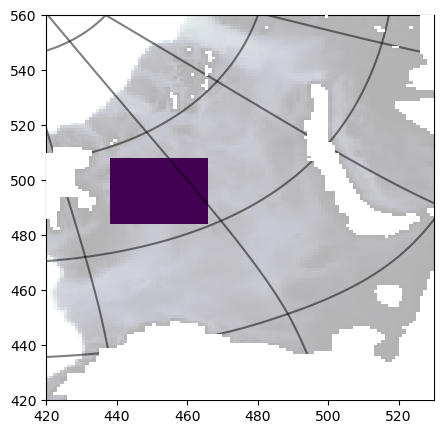

In [10]:
mask = np.zeros_like(lat)
# max_row -=15
# max_col -=15
# min_col += 15
# max_col -= 8 # for a crude representation of the polar front
mask[min_row:max_row,min_col:max_col] = 1
mask[mask == 0] = np.nan
msk_tobin = mask.copy()

fig = plt.figure(figsize=(5,5))

plt.pcolormesh(get_aste_tracer(mygrid['Depth'], nfx, nfy)[0],
               cmap="bone", alpha=0.3, vmin=0, vmax=1000)
plt.pcolormesh(get_aste_tracer(mask, nfx, nfy)[0])
# Draw the hfC_modified layer with a lower zorder
plt.pcolormesh(get_aste_tracer(hfC_modified, nfx, nfy)[0],
               cmap="bone_r", zorder=3)

# Now plot contours with a higher zorder
extent = [xlims[0], xlims[1], ylims[0], ylims[1]]
CS = plt.contour(get_aste_tracer(lat, nfx, nfy)[0],
                 levels=np.arange(70, 90, 5),
                 colors="black", zorder=1,alpha=0.5)
CS = plt.contour(get_aste_tracer(lon, nfx, nfy)[0],
                 levels=np.arange(0, 90, 20),
                 colors="black", zorder=1,alpha=0.5)
plt.clabel(CS, inline=True, fontsize=8)

plt.xlim(xlims)
plt.ylim(ylims)
plt.show()

(420.0, 560.0)

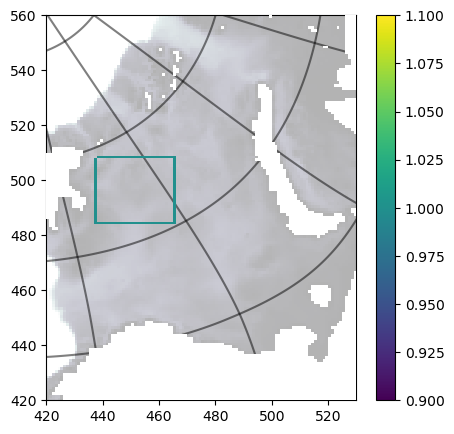

In [12]:
# get the four edges of this
topx = np.arange(min_col,max_col)
topy = np.full(topx.shape[0],max_row)
botx = np.arange(min_col,max_col)
boty = np.full(botx.shape[0],min_row)

righty = np.arange(min_row,max_row)
rightx = np.full(righty.shape[0],max_col)
lefty = np.arange(min_row,max_row)
leftx = np.full(lefty.shape[0],min_col)

# fill these in a new mask
mask = np.zeros_like(lat)
mask[topy,topx] = 1
mask[boty,botx] = 2
mask[righty,rightx] = 3
mask[lefty,leftx] = 4  # this is in fact the wrong terminology because this is flipped on face 3
mask[mask == 0] = np.nan

# mask[mask>1]=1

# plot this
fig = plt.figure(figsize = (5,5))
plt.pcolormesh(get_aste_tracer(mygrid['Depth'],nfx,nfy)[0],cmap="bone",alpha=0.3,vmin=0,vmax=1000)
plt.pcolormesh(get_aste_tracer(hfC_modified,nfx,nfy)[0],cmap="bone_r",zorder=5)
cb = plt.pcolormesh(get_aste_tracer(mask,nfx,nfy)[0],zorder=10)

CS = plt.contour(get_aste_tracer(lat, nfx, nfy)[0],
                 levels=np.arange(70, 90, 5),
                 colors="black", zorder=1,alpha=0.5)
CS = plt.contour(get_aste_tracer(lon, nfx, nfy)[0],
                 levels=np.arange(0, 90, 20),
                 colors="black", zorder=1,alpha=0.5)
plt.colorbar(cb)
plt.xlim(xlims)
plt.ylim(ylims)

In [13]:
mask[mask>1]=1
np.save("mask_Lind_square.npy", mask)

# now get the binned T and S values, the U and V terms to calculate volume flow

In [12]:
# define the timesteps we want, we need theta, salt, binned_theta, binned_salt and U and V to get volume

In [14]:
# get the timesteps for the year 2007
# ocean and ice
AB_gT=0
AB_gS=0
dt_aste = 600
startyr = 2002
endyr = 2019

# all the filenames in the system
fnames = get_fnames(dt_aste,startyr,endyr)

times = {}
times["2007"] = np.arange(3,5,1)

# the filenames we want for 2014
tsstr,datetimes = get_tsteps(times,fnames,dt_aste,startyr,1,1)

t2 = int(tsstr[1])
dt = datetimes[1]-datetimes[0]   # days
dt = dt.total_seconds()

tsteps = len(datetimes)-1
tsteps

1

In [14]:
# load the bins
# we will use the bins from the An run so that we have the same thing in both sections
# Paths for the bins in this run
copypath = "/scratch/mmurakami/ASTE_270/LAYERS_copies/"
filename = "layers2TH"
boundsT = rdmds(copypath + filename)
binsTH_edges = boundsT.reshape(boundsT.shape[0])
binsTH_centers = (binsTH_edges[:-1] + binsTH_edges[1:])/2
nT = binsTH_edges.shape[0]-1
# boundsT

filename = "layers1SLT"
boundsS = rdmds(copypath + filename)
binsSLT_edges = boundsS.reshape(boundsS.shape[0])
binsSLT_centers = (binsSLT_edges[:-1] + binsSLT_edges[1:])/2
nS = binsSLT_edges.shape[0]-1
# boundsS

binwidthT = binsTH_edges[1:] - binsTH_edges[:-1]
binwidthS = binsSLT_edges[1:] - binsSLT_edges[:-1]

binwidthT1 = (binwidthT[:-1] + binwidthT[1:])/2
binwidthS1 = (binwidthS[:-1] + binwidthS[1:])/2

dT,dS = np.meshgrid(binwidthT,binwidthS)
dT = dT.reshape(112,112,1)
dS = dS.reshape(112,112,1)

binmidT = ((boundsT[:-1] + boundsT[1:])/2).reshape(nT)
binmidS = ((boundsS[:-1] + boundsS[1:])/2).reshape(nT)

binmidTp = boundsT[1:-1]
binmidSp = boundsS[1:-1]

Tbin,Sbin = np.meshgrid(binsTH_edges,binsSLT_edges)
Tbincent,Sbincent = np.meshgrid(binsTH_centers,binsSLT_centers)
nS,nT = 112,112

binmidTp = boundsT[1:-1]
binmidSp = boundsS[1:-1]
Tbin2,Sbin2 = np.meshgrid(binmidTp,binmidSp)

In [15]:
# add the isopycnals
# add the density contours from gsw
smin = 25.5 - (0.01 * 25.5)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 38 + (0.01 * 38)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -2 + (0.1 * -2)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = 31 + (0.1 * 31)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 50
ydim = 50
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-2,31,ydim)
si = np.linspace(25.5,38,xdim)
Freez_temp = gsw.CT_freezing(si,0,0)

Si, Ti = np.meshgrid(si, ti, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        #print(si[i],ti[j])
        dens[j,i]=gsw.rho(si[i],ti[j],0)
        # Substract 1000 to convert to sigma-0
dens2 = dens - 1000

tmin, tmax, smin, smax sizes=, -2.2 34.1 25.245 38.38


In [16]:
# read the averaged theta and salt files
file_name = "state_3d_set1"
meta_budg3d_kpptend_set1 = parsemeta(dirState + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_kpptend_set1["fldList"])
varnames = np.array(["THETA","SALT"])
recs = np.array([])
t2 = int(tsstr[1])  # read from the end of the averaged period
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
THETA,its,meta = rdmds(os.path.join(dirState, file_name),t2,returnmeta=True,rec=recs[0])
SALT,its,meta = rdmds(os.path.join(dirState, file_name),t2,returnmeta=True,rec=recs[1])

THETA = THETA.reshape(nz,ny,nx) * np.tile(msk_tobin[np.newaxis,:,:],(nz,1,1))
SALT = SALT.reshape(nz,ny,nx) * np.tile(msk_tobin[np.newaxis,:,:],(nz,1,1))

In [17]:
# bin the existing theta and salt
binned_theta = bin_array(THETA,binsTH_edges)
binned_theta = binned_theta.astype(float)
binned_theta[binned_theta == nT] = np.nan
binned_salinity = bin_array(SALT,binsSLT_edges)
binned_salinity = binned_salinity.astype(float)
binned_salinity[binned_salinity == nS] = np.nan

In [18]:
# create the volume and bin this
DXG3d = np.tile(mygrid['DXG'][np.newaxis,:,:],(nz,1,1))
DYG3d = np.tile(mygrid['DYG'][np.newaxis,:,:],(nz,1,1))
vol = DRF3d * DXG3d * DYG3d

In [19]:
# load the UVELMASS and VVELMASS - these are time averaged
file_name = "budg3d_hflux_set2"
meta_budg3d_hflux_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_hflux_set2["fldList"])
varnames = np.array(["UVELMASS","VVELMASS"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
UVELMASS,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
VVELMASS,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])  # m/s

UVELMASS = UVELMASS.reshape(nz,ny,nx) * np.tile(msk_tobin[np.newaxis,:,:],(nz,1,1))
VVELMASS = VVELMASS.reshape(nz,ny,nx) * np.tile(msk_tobin[np.newaxis,:,:],(nz,1,1))

In [20]:
# get the vertical volume transport - I think this needs to be X * Z or Y * Z
Vtransport = VVELMASS * DXG3d * DRF3d # m/s * m * m = m^3/s
Utransport = UVELMASS * DYG3d * DRF3d # m/s * m * m = m^3/s

# plot just the volume transport in and out of the gates (not normalized)

In [21]:
# Assuming necessary variables and arrays like nS, nT, binned_theta, binned_salinity, Utransport, Vtransport, mask, nz, dT are defined

# Create an array for all distributions
distr = np.zeros((4, nS, nT))

# Define the gates and their corresponding signs and transports
gates = {
    'West': (1, 1, Utransport),
    'East': (2, -1, Utransport),
    'North': (3, -1, Vtransport),
    'South': (4, 1, Vtransport)
}

# Process each gate
for gate_idx, (gate_key, (mask_val, sign, transport)) in enumerate(gates.items()):
    y, x = np.where(mask == mask_val)
    
    # Adjust indices based on gate location
    if gate_key == "West":
        y_adj,x_adj = y-1,x
    elif gate_key == "North":
        y_adj,x_adj = y,x-1
    else:
        y_adj, x_adj = y, x

    # Obtain theta and salinity bins
    gate_thetabins = binned_theta[:, y_adj, x_adj]
    gate_saltbins = binned_salinity[:, y_adj, x_adj]

    # Aggregate the transport contributions
    for z in range(nz):
        iT = gate_thetabins[z].astype(int)
        iS = gate_saltbins[z].astype(int)
        
        # Use numpy indexing to update distributions
        if gate_idx == "West":
            np.add.at(distr[gate_idx], (iS, iT), sign * transport[z, y_adj, x_adj] / binwidthS[iS] / binwidthT[iT])
        elif gate_idx == "North":
            np.add.at(distr[gate_idx], (iS, iT), sign * transport[z, y_adj, x_adj] / binwidthS[iS] / binwidthT[iT])
        else:
            np.add.at(distr[gate_idx], (iS, iT), sign * transport[z, y_adj, x_adj] / binwidthS[iS] / binwidthT[iT])  # m^3/s/degC/PSU

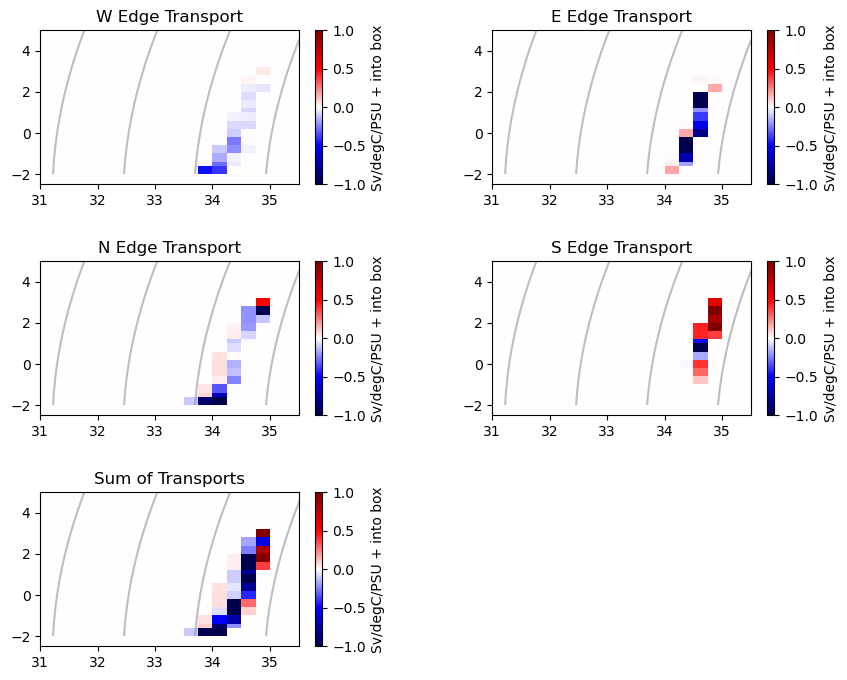

In [22]:
# Assume Sbin, Tbin, distr arrays, and other necessary data are defined as per your data structure
vlev = 1

fig = plt.figure(figsize=(10, 8))

# Define subplots
axes = []
for i in range(5):
    axes.append(fig.add_subplot(3, 2, i+1))

# Plot settings for individual gates
titles = ["W Edge Transport", "E Edge Transport", "N Edge Transport", "S Edge Transport", "Sum of Transports"]
for i in range(4):
    cb = axes[i].pcolormesh(Sbin, Tbin, distr[i]*1e-6, cmap='seismic', vmin=-vlev, vmax=vlev)
    axes[i].set_ylim(-2.5, 5)
    axes[i].set_xlim(31, 35.5)
    plt.colorbar(cb, ax=axes[i], label="Sv/degC/PSU + into box")
    cs = axes[i].contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
    axes[i].clabel(cs, fontsize=10, inline=False, fmt="%.f")
    axes[i].set_title(titles[i])

# Sum of all transports for the fifth plot
total_transport = np.sum(distr[:4], axis=0)  # Assuming distr[0] to distr[3] are the four edge transports
cb = axes[4].pcolormesh(Sbin, Tbin, total_transport*1e-6, cmap='seismic', vmin=-vlev, vmax=vlev)
axes[4].set_ylim(-2.5, 5)
axes[4].set_xlim(31, 35.5)
plt.colorbar(cb, ax=axes[4], label="Sv/degC/PSU + into box")
cs = axes[4].contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
axes[4].clabel(cs, fontsize=10, inline=False, fmt="%.f")
axes[4].set_title(titles[4])

plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()


# plot just the pcolormesh of U or V transport in T-S space at the four gates

In [23]:
# Assuming necessary variables and arrays like nS, nT, binned_theta, binned_salinity, Utransport, Vtransport, mask, nz, dT are defined

# Create an array for all distributions
M_T_y = np.zeros((4, nS, nT))      # this should be of units Sv/PSU
M_S_x = np.zeros((4, nS, nT))      # this should be of units Sv/degC
vol_mesh = np.zeros((4, nS, nT))   # this will be volume units at the gate

# Define the gates and their corresponding signs and transports
gates = {
    'West': (1, 1, Utransport),
    'East': (2, -1, Utransport),
    'North': (3, -1, Vtransport),
    'South': (4, 1, Vtransport)
}

# Process each gate
for gate_idx, (gate_key, (mask_val, sign, transport)) in enumerate(gates.items()):
    y, x = np.where(mask == mask_val)
    
    # Adjust indices based on gate location
    if gate_key == "West":
        y_adj,x_adj = y-1,x
    elif gate_key == "North":
        y_adj,x_adj = y,x-1
    else:
        y_adj, x_adj = y, x
        
    gate_thetabins = binned_theta[:, y_adj, x_adj]
    gate_saltbins = binned_salinity[:, y_adj, x_adj]

    # Aggregate the transport contributions
    for z in range(nz):
        
        iT = gate_thetabins[z].astype(int)
        iS = gate_saltbins[z].astype(int)
        
        # Use numpy indexing to update distributions
        # we need to add normalization based on the bin widths
        if gate_key == "West":
            np.add.at(M_T_y[gate_idx], (iS, iT), sign * transport[z, y-1, x] / binwidthS[iS] *1e-6)  # Sv/PSU
            np.add.at(M_S_x[gate_idx], (iS, iT), sign * transport[z, y-1, x] / binwidthT[iT] *1e-6)  # Sv/degC
        elif gate_key == "North":
            np.add.at(M_T_y[gate_idx], (iS, iT), sign * transport[z, y, x-1] / binwidthS[iS] *1e-6)  # Sv/PSU
            np.add.at(M_S_x[gate_idx], (iS, iT), sign * transport[z, y, x-1] / binwidthT[iT] *1e-6)  # Sv/degC

        else:
            np.add.at(M_T_y[gate_idx], (iS, iT), sign * transport[z, y, x] / binwidthS[iS] *1e-6)    # Sv/PSU
            np.add.at(M_S_x[gate_idx], (iS, iT), sign * transport[z, y, x] / binwidthT[iT] *1e-6)    # Sv/degC

    # define the volume
    for z in range(nz):
        iT = gate_thetabins[z].astype(int)
        iS = gate_saltbins[z].astype(int)

        if gate_key == "West":
            np.add.at(vol_mesh[gate_idx], (iS, iT), vol[z, y-1, x])      # m^3
        elif gate_key == "North":
            np.add.at(vol_mesh[gate_idx], (iS, iT), vol[z, y, x-1])      # m^3  
        else:
            np.add.at(vol_mesh[gate_idx], (iS, iT), vol[z, y, x])        # m^3

    # normalize by T and S
    vol_mesh[gate_idx] /= dT[:,:,0]   # m^3/degC
    vol_mesh[gate_idx] /= dS[:,:,0]   # m^3/degC/PSU

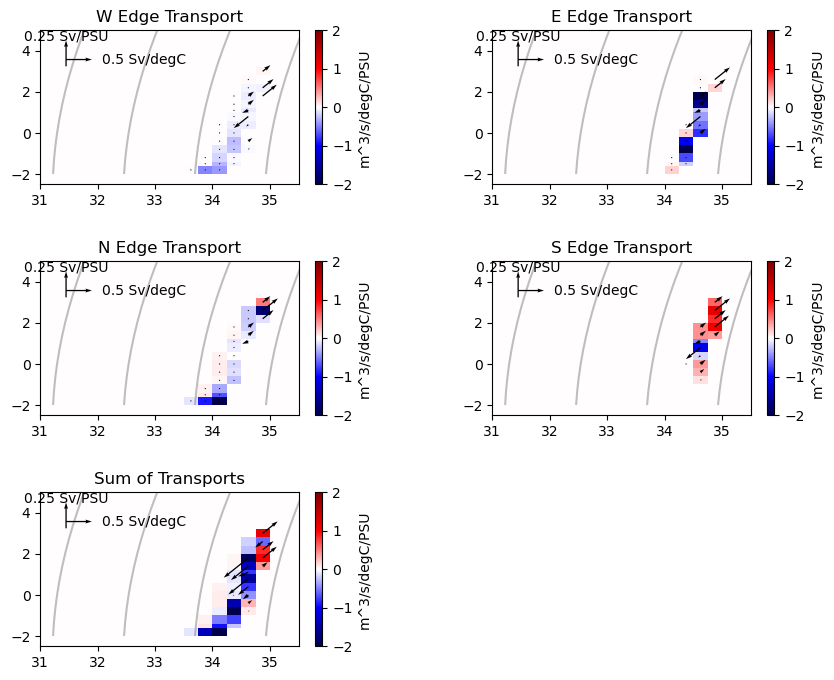

In [24]:
# Assume definition of vol_mesh, M_S_x and M_T_y are defined previously, this will be background and vectors
vlev = 2
alpha = 1
beta = .5
arrow_length = 0.25
step=2
t = 0
U = .5
scale = 5e0

fig = plt.figure(figsize=(10, 8))

# Define subplots
axes = []
for i in range(5):
    axes.append(fig.add_subplot(3, 2, i+1))

# Plot settings for individual gates
titles = ["W Edge Transport", "E Edge Transport", "N Edge Transport", "S Edge Transport", "Sum of Transports"]
for i in range(4):
    # add the colormesh
    cb = axes[i].pcolormesh(Sbin, Tbin, distr[i]*1e-6, cmap='seismic', vmin=-vlev, vmax=vlev)
    axes[i].set_ylim(-2.5, 5)
    axes[i].set_xlim(31, 35.5)
    plt.colorbar(cb, ax=axes[i], label="m^3/s/degC/PSU")
    cs = axes[i].contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
    axes[i].clabel(cs, fontsize=10, inline=False, fmt="%.f")
    axes[i].set_title(titles[i])

    # # add the quivers
    U1,V1 = M_S_x[gate_idx], M_T_y[gate_idx]
    U1, V1 = U1 * alpha, V1 * beta
    U1[distr[i]==0] = np.nan
    V1[distr[i] ==0] = np.nan
    q1 = axes[i].quiver(Sbincent, Tbincent, U1, V1, width=0.005, scale=scale)
    quiver_length = 1.0  # Set the length of the arrow for the key
    axes[i].quiverkey(q1,X=0.2,Y=0.81,U = U,label=str(U * alpha) + " Sv/degC",labelpos='E')
    axes[i].quiverkey(q1, X=0.1, Y=0.85, U=U, label=str(U * beta) + " Sv/PSU",angle=90, labelpos='N', coordinates='axes')

# Sum of all transports for the fifth plot
total_transport = np.sum(distr[:4], axis=0)*1e-6  # Assuming distr[0] to distr[3] are the four edge transports
cb = axes[4].pcolormesh(Sbin, Tbin, total_transport, cmap='seismic', vmin=-vlev, vmax=vlev)
axes[4].set_ylim(-2.5, 5)
axes[4].set_xlim(31, 35.5)
plt.colorbar(cb, ax=axes[4], label="m^3/s/degC/PSU")
cs = axes[4].contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
axes[4].clabel(cs, fontsize=10, inline=False, fmt="%.f")
axes[4].set_title(titles[4])

# # add the quivers
U1,V1 = np.sum(M_S_x[:4],axis=0), np.sum(M_T_y[:4],axis=0)
U1, V1 = U1 * alpha, V1 * beta
U1[distr[i]==0] = np.nan
V1[distr[i] ==0] = np.nan
q1 = axes[4].quiver(Sbincent, Tbincent, U1, V1, width=0.005, scale=scale)
quiver_length = 1.0  # Set the length of the arrow for the key
axes[4].quiverkey(q1,X=0.2,Y=0.81,U = U,label=str(U * alpha) + " Sv/degC",labelpos='E')
axes[4].quiverkey(q1, X=0.1, Y=0.85, U=U, label=str(U * beta) + " Sv/PSU",angle=90, labelpos='N', coordinates='axes')

plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

# I'm not sure if vectors is the right way to go about this

In [34]:
# I think we need to calculate dv/dt by the snaps of temperature and salinity

In [25]:
# J_terms_nn have the Sv that we need at each value, can we not plot these as well?

# I think we want to plot G_T and G_S as well as the surface term, which will be volume added to any one set of T-S bins

# set a larger array for one year of the terms

vol_mesh_all = np.zeros((tsteps,nS,nT))
JtermsT_all = np.zeros((tsteps,5,nS,nT))  # recall this is in the format tend, adv, df, kpp, and surface
JtermsS_all = np.zeros((tsteps,5,nS,nT))
JtermsT_nn_all = np.zeros((tsteps,5,nS,nT))
JtermsS_nn_all = np.zeros((tsteps,5,nS,nT))

In [26]:
iB = 6
for i in range(len(datetimes)-1):
    print(datetimes[i])
    tsstrhere = tsstr[i:i+2]
    datetimeshere = datetimes[i:i+2]
    dt = datetimes[i+1]-datetimes[i]
    dt = dt.total_seconds()
    t2 = int(tsstr[i+1])

    # run the function - check if this works
    vol_mesh,JtermsT,JtermsS,JtermsT_nn,JtermsS_nn = get_Jterms(fnames,tsstrhere,datetimeshere,dt,t2,msk_tobin,iB,RAC,RAC3,myparms)

    vol_mesh_all[i] = vol_mesh
    JtermsT_all[i] = JtermsT
    JtermsS_all[i] = JtermsS
    JtermsT_nn_all[i] = JtermsT_nn
    JtermsS_nn_all[i] = JtermsS_nn

2007-03-01 00:00:00
doing salt budget
doing heat budget
2
doing volume
doing TS binning
creating the J terms now
doing JtermsT
total residual -1.4205257341492046e-13 Sv/PSU
doing JtermsS
total residual -0.0021008129652809525 Sv/degC
doing not normalized J terms
total residual -1.4205257341492046e-13 Sv
total residual -0.0021008129652809525 Sv


In [27]:
cmap = plt.get_cmap('RdBu_r',31).copy()
cmap.set_under(color='white')
cmap2 = plt.get_cmap('viridis',31).copy()
cmap2.set_under(color='white')

/tmp/ipykernel_1007782/3934668933.py:9: RuntimeWarning: divide by zero encountered in log10
  cb1 = ax.pcolormesh(Sbin, Tbin, np.log10(vol_mesh), cmap=cmap2, vmin=10,vmax=14)


Text(0.5, 1.0, 'Sum of Transports')

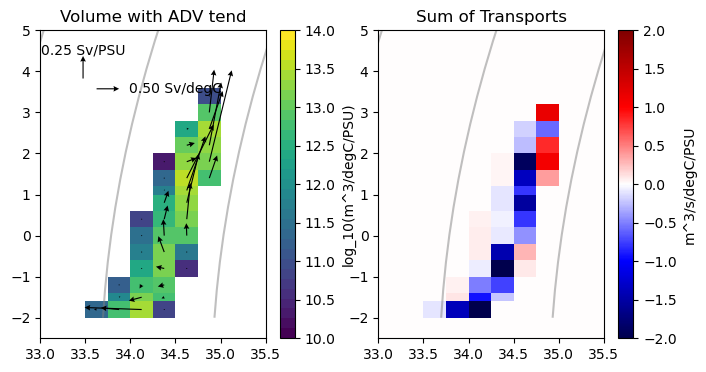

In [139]:
# plot just the advective term
ypos1, ypos2, xpos1, xpos2 = 0.81, 0.88, 0.35, 0.19

fig = plt.figure(figsize = (8,4))

# first subplot - volume distribution with advective transports
ax = plt.subplot(121)
# vol_mesh[JtermsS[1] < 0.000001] = np.nan   # TEST to see!!!!!! NOT ACCURATE VOL_MESH
cb1 = ax.pcolormesh(Sbin, Tbin, np.log10(vol_mesh), cmap=cmap2, vmin=10,vmax=14)
plt.colorbar(cb1, label="log_10(m^3/degC/PSU)")
ax.set_xlim(33,35.5)
ax.set_ylim(-2.5,5)
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_title("Volume with ADV tend")

# add the quivers for advection
U1, V1 = JtermsS[1], JtermsT[1]  # Select tendency terms
U1, V1 = U1 * alpha, V1 * beta
U1[U1 == 0], V1[V1 == 0] = np.nan, np.nan
q = ax.quiver(Sbincent, Tbincent, U1, V1, 
                  width=0.005, scale=scale, zorder=3, headwidth=5)
ax.quiverkey(q, X=xpos1, Y=ypos1, U=U, label=f"{U*alpha:.2f} Sv/degC", labelpos='E')
ax.quiverkey(q, X=xpos2, Y=ypos2, U=U, label=f"{U*beta:.2f} Sv/PSU", angle=90, labelpos='N', coordinates='axes')



# second subplot - gate transports
ax = plt.subplot(122)
cb = ax.pcolormesh(Sbin, Tbin, total_transport, cmap='seismic', vmin=-vlev, vmax=vlev)
ax.set_xlim(33, 35.5)
ax.set_ylim(-2.5, 5)
plt.colorbar(cb, ax=ax, label="m^3/s/degC/PSU")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_title(titles[4])

# Let's try to recreate eq. 20 of the Hieronymus 2014 paper

$$
\frac{\partial v}{\partial t} = -\nabla \textbf{J} - \frac{\partial ^2 M}{\partial T \partial S} - \frac{\partial ^2 E}{\partial T \partial S} 
$$

In [35]:
# we need to calculate dv/dt by the snaps of temperature and salt
AB_gT=0
AB_gS=0
dt_aste = 600
startyr = 2002
endyr = 2019

# all the filenames in the system
fnames = get_fnames(dt_aste,startyr,endyr)

times = {}
times["2007"] = np.arange(3,5,1)

# the filenames we want for 2014
tsstr,datetimes = get_tsteps(times,fnames,dt_aste,startyr,1,1)

t2 = int(tsstr[1])
dt = datetimes[1]-datetimes[0]   # days
dt = dt.total_seconds()

tsteps = len(datetimes)-1
tsteps

1

In [37]:
myparms['useRFWF']

1

In [52]:
# define dETAN/dt -  I don't think we want to do this yet I think we want to bin first and then calculate
file_name = 'budg2d_snap_set1'
meta_budg2d_snap_set1 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")

# try to read this with rec
fldlist = np.array(meta_budg2d_snap_set1['fldList'])
varnames = np.array(['ETAN'])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])

ETAN = np.full((len(tsstr),ny,nx),np.nan)

for i in range(len(tsstr)):
    thisETAN,its,meta = rdmds(os.path.join(dirIn, file_name),int(tsstr[i]),returnmeta=True,rec=recs[0])
    thisETAN = thisETAN.reshape(ny,nx)
    ETAN[i] = thisETAN

# dETANdt =  (ETAN[1, :, :] - ETAN[0, :, :]) / dt    # m/s

# define dV/dt
dz = mk3D_mod(mygrid['DRF'],hfC) * hfC           # m (dZ)
dxdy = RAC3
volume = np.zeros((len(tsstr),nz,ny,nx))
for i in range(len(tsstr)):
    volume[i] = (dz + ETAN[i]) * dxdy * np.tile(msk_tobin[np.newaxis,:,:],(nz,1,1))           # m^3

(400.0, 600.0)

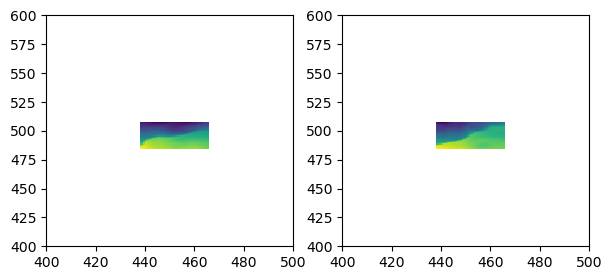

In [53]:
fig = plt.figure(figsize = (7,3))
ax = plt.subplot(121)
ax.pcolormesh(get_aste_tracer(volume[0],nfx,nfy)[0])
ax.set_xlim(400,500)
ax.set_ylim(400,600)

ax = plt.subplot(122)
ax.pcolormesh(get_aste_tracer(volume[1],nfx,nfy)[0])
ax.set_xlim(400,500)
ax.set_ylim(400,600)

In [54]:
# get ETAN as snapshots, get THETADR and SALTDR as snapshots

file_name = 'budg3d_snap_set2'
meta_budg3d_snap_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_snap_set2["fldList"])
varnames = np.array(["THETADR","SALTDR"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])

THETA = np.full((len(tsstr),nz,ny,nx),np.nan)
SALT = np.full((len(tsstr),nz,ny,nx),np.nan)

for i in range(len(tsstr)):
    thisTHETADR,its,meta = rdmds(os.path.join(dirIn, file_name),int(tsstr[i]),returnmeta=True,rec=recs[0])
    thisTHETADR = thisTHETADR.reshape(nz,ny,nx)
    THETA[i] = thisTHETADR / DRF3d  * np.tile(msk_tobin[np.newaxis,:,:],(nz,1,1))  # degC
    thisSALTDR,its,meta = rdmds(os.path.join(dirIn, file_name),int(tsstr[i]),returnmeta=True,rec=recs[1])
    thisSALTDR = thisSALTDR.reshape(nz,ny,nx)
    SALT[i] = thisSALTDR / DRF3d  * np.tile(msk_tobin[np.newaxis,:,:],(nz,1,1)) # PSU

(400.0, 600.0)

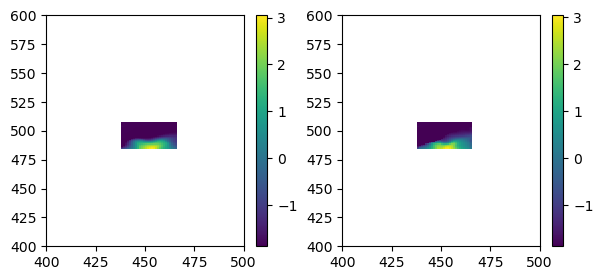

In [55]:
fig = plt.figure(figsize = (7,3))
ax = plt.subplot(121)
cb = ax.pcolormesh(get_aste_tracer(THETA[0],nfx,nfy)[0])
plt.colorbar(cb)
ax.set_xlim(400,500)
ax.set_ylim(400,600)

ax = plt.subplot(122)
cb = ax.pcolormesh(get_aste_tracer(THETA[1],nfx,nfy)[0])
plt.colorbar(cb)
ax.set_xlim(400,500)
ax.set_ylim(400,600)

In [59]:
# create the TS bins for the two timesteps

binned_theta_new = np.zeros((len(tsstr),nz,ny,nx))
binned_salt_new = np.zeros((len(tsstr),nz,ny,nx))

for i in range(len(tsstr)):
    binned_thetai = bin_array(THETA[i],binsTH_edges)
    binned_thetai = binned_thetai.astype(float)
    binned_thetai[binned_thetai == nT] = np.nan      # I think this line is why we have previously had the mismatch between layers and avg
    binned_salinityi = bin_array(SALT[i],binsSLT_edges)
    binned_salinityi = binned_salinityi.astype(float)
    binned_salinityi[binned_salinityi == nS] = np.nan

    # set these in the larger array
    binned_theta_new[i] = binned_thetai
    binned_salt_new[i] = binned_salinityi

In [62]:
# create the volume meshes for the two timesteps and plot
idxs = np.where(msk_tobin == 1)
npoints = len(idxs[0])
mesh = create_TS_mesh(tsstr,nS,nT,npoints,binned_salt_new, binned_theta_new,volume,idxs,dT,dS)

(-2.0, 6.0)

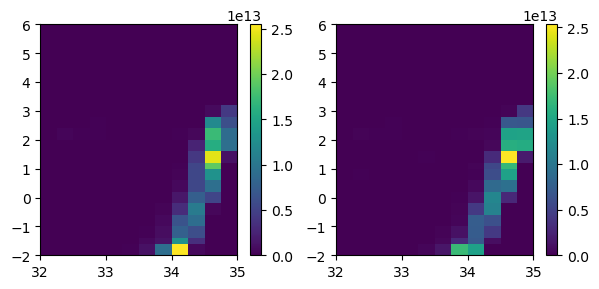

In [65]:
# now we can calculate dV/dt
dVdt = (np.nansum(mesh[1],axis=2) - np.nansum(mesh[0],axis=2)) / dt   # m^3/degC/PSU / s = m^3/s/degC/PSU

(-2.0, 6.0)

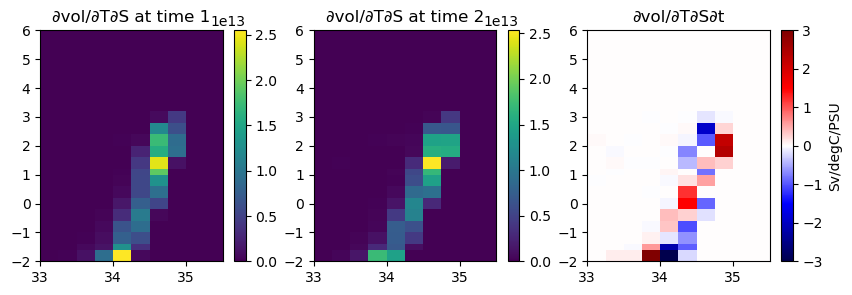

In [71]:
# test this, this is already normalized by dT and dS
fig = plt.figure(figsize = (10,3))
ax = plt.subplot(131)
data = np.nansum(mesh[0],axis=2)
cb = ax.pcolormesh(Sbin,Tbin,data)
plt.colorbar(cb)
ax.set_title("∂vol/∂T∂S at time 1")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,6)

ax = plt.subplot(132)
data = np.nansum(mesh[1],axis=2)
cb = ax.pcolormesh(Sbin,Tbin,data)
ax.set_title("∂vol/∂T∂S at time 2")
plt.colorbar(cb)
ax.set_xlim(33,35.5)
ax.set_ylim(-2,6)

ax = plt.subplot(133)
cb = ax.pcolormesh(Sbin,Tbin,dVdt*1e-6,cmap="seismic",vmin=-3,vmax=3)
ax.set_title("∂vol/∂T∂S∂t")
plt.colorbar(cb,label="Sv/degC/PSU")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,6)

In [32]:
# define each of the terms in the equation
    # distr = ∂^2M/∂T∂S = m^3/s/degC/PSU   (NOT YET SV)
    # (vol_mesh[1] - vol_mesh[0])/dt = ∂v/∂t = m^3/s/degC/PSU   (vol has already been normalized by dT and dS
    # JtermsT_all[1][1:3] = m^3/PSU  internal processes
    # JtermsS_all[1][1:3] = m^3/degC internal processes
    # JtermsT_all[1][4] = m^3/PSU surface processes
    # JtermsS_all[1][4] = m^3/degC surface processes
    # JtermsT_all[1][0] = m^3/PSU all tendency including adv, diff, kpp, surface
    # JtermsS_all[1][0] = m^3/degC all tendency including adv, diff, kpp, surface

Text(0.5, 1.0, '∂^2 M / ∂T ∂S')

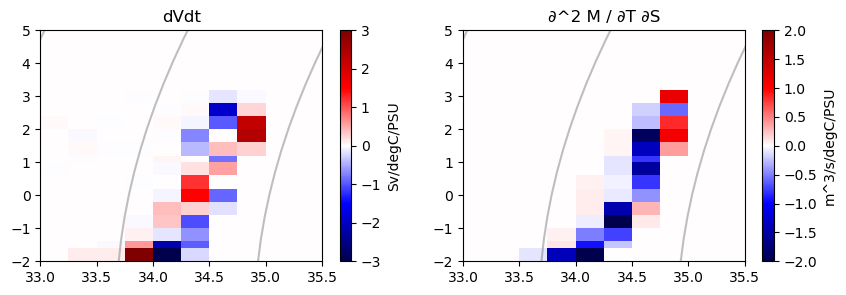

In [79]:
# define nabla J based on the total tendency

# test this, this is already normalized by dT and dS
fig = plt.figure(figsize = (10,3))

ax = plt.subplot(121)
cb = ax.pcolormesh(Sbin,Tbin,dVdt*1e-6,cmap="seismic",vmin=-3,vmax=3)
ax.set_title("dVdt")
plt.colorbar(cb,label="Sv/degC/PSU")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,5)

ax = plt.subplot(122)
cb = ax.pcolormesh(Sbin, Tbin, total_transport, cmap='seismic', vmin=-vlev, vmax=vlev)
ax.set_xlim(33, 35.5)
ax.set_ylim(-2, 5)
plt.colorbar(cb, ax=ax, label="m^3/s/degC/PSU")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_title("∂^2 M / ∂T ∂S")

In [138]:
binwidthTtile = np.tile(binwidthT[np.newaxis,:],(nS,1))
binwidthStile = np.tile(binwidthT[:,np.newaxis],(1,nT))

In [156]:
# do the gradient -- np grad is causing issues so we need to rework

# J_S_div = np.gradient(JtermsS_all[0][0], binwidthS, axis=0)  # already Sv/degC, derivative over S
# J_T_div = np.gradient(JtermsT_all[0][0], binwidthT, axis=1)  # already Sv/PSU, derivative over T

# WRONG:

def compute_gradient_manual(data_s, data_t, spacing_s, spacing_t):
    # Gradient for salinity along axis 0
    gradient_s = np.zeros_like(data_s)
    gradient_s[1:-1] = (data_s[2:] - data_s[:-2]) / (spacing_s[2:] + spacing_s[:-2])
    gradient_s[0] = (data_s[1] - data_s[0]) / spacing_s[1]  # forward difference at start
    gradient_s[-1] = (data_s[-1] - data_s[-2]) / spacing_s[-1]  # backward difference at end

    # Gradient for temperature along axis 1
    gradient_t = np.zeros_like(data_t)
    gradient_t[:, 1:-1] = (data_t[:, 2:] - data_t[:, :-2]) / (spacing_t[:, 2:] + spacing_t[:, :-2])
    gradient_t[:, 0] = (data_t[:, 1] - data_t[:, 0]) / spacing_t[:, 1]  # forward difference at start
    gradient_t[:, -1] = (data_t[:, -1] - data_t[:, -2]) / spacing_t[:, -1]  # backward difference at end

    return gradient_s, gradient_t

# Compute gradients manually for both directions
J_S_div, J_T_div = compute_gradient_manual(JtermsS_all[0][0], JtermsT_all[0][0], binwidthStile, binwidthTtile)

# make one for the internal processes
J_S_div_int, J_T_div_int = compute_gradient_manual(np.nansum(JtermsS_all[0][1:4],axis=0), np.nansum(JtermsT_all[0][1:4],axis=0), binwidthStile, binwidthTtile)

# make one set for the surface processes for E
J_S_div_surf, J_T_div_surf = compute_gradient_manual(JtermsS_all[0][4], JtermsT_all[0][4], binwidthStile, binwidthTtile)


# units are now Sv/degC/PSU and Sv/degC/PSU for both
div_J = J_S_div + J_T_div
div_J_int = J_S_div_int + J_T_div_int
div_J_surf = J_S_div_surf + J_T_div_surf


# I think we need to mask this because this is taking zero values at the edges to be true
div_J[JtermsS_all[0][0] == 0] = 0
div_J_int[JtermsS_all[0][0] == 0] = 0
div_J_surf[JtermsS_all[0][0] == 0] = 0

/tmp/ipykernel_1007782/2845761187.py:16: RuntimeWarning: divide by zero encountered in log10
  cb = ax.pcolormesh(Sbin,Tbin,np.log10(vol_mesh),cmap="viridis",vmin=10,vmax=14)


Text(0.5, 1.0, '∂^2 M / ∂T ∂S')

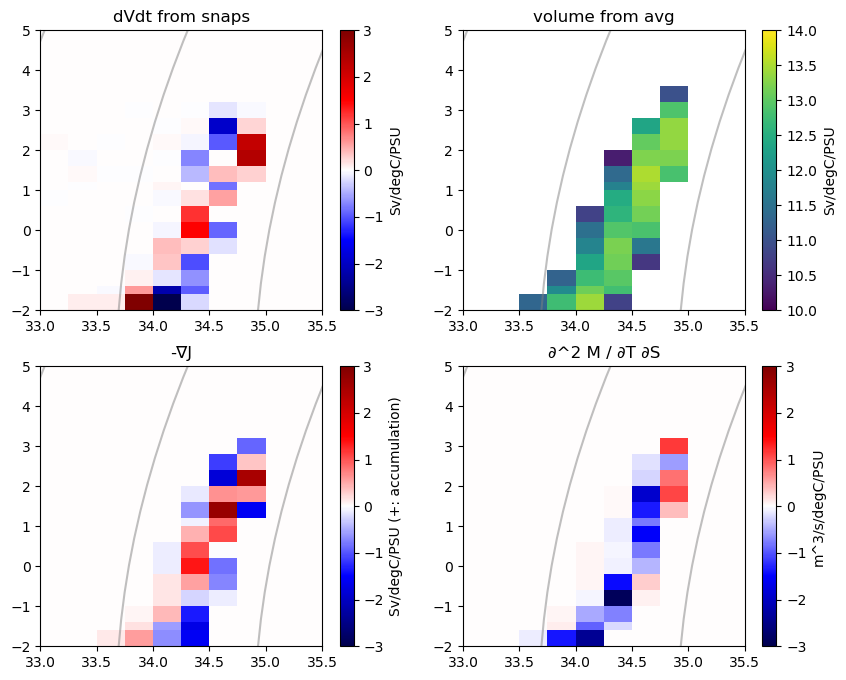

In [157]:
# test this, this is already normalized by dT and dS
fig = plt.figure(figsize = (10,8))

ax = plt.subplot(221)
cb = ax.pcolormesh(Sbin,Tbin,dVdt*1e-6,cmap="seismic",vmin=-3,vmax=3)
# cb = ax.pcolormesh(Sbin,Tbin,np.log10(vol_mesh),cmap="viridis",vmin=10,vmax=14)
ax.set_title("dVdt from snaps")
plt.colorbar(cb,label="Sv/degC/PSU")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,5)

ax = plt.subplot(222)
# cb = ax.pcolormesh(Sbin,Tbin,dVdt*1e-6,cmap="seismic",vmin=-3,vmax=3)
cb = ax.pcolormesh(Sbin,Tbin,np.log10(vol_mesh),cmap="viridis",vmin=10,vmax=14)
ax.set_title("volume from avg")
plt.colorbar(cb,label="Sv/degC/PSU")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,5)

ax = plt.subplot(223)
cb = ax.pcolormesh(Sbin,Tbin,-div_J,cmap="seismic",vmin=-3,vmax=3)
ax.set_title("-∇J")
plt.colorbar(cb,label="Sv/degC/PSU (+: accumulation)")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,5)

ax = plt.subplot(224)
cb = ax.pcolormesh(Sbin, Tbin, total_transport, cmap='seismic', vmin=-3, vmax=3)
ax.set_xlim(33, 35.5)
ax.set_ylim(-2, 5)
plt.colorbar(cb, ax=ax, label="m^3/s/degC/PSU")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_title("∂^2 M / ∂T ∂S")

Text(0.5, 1.0, 'resid?')

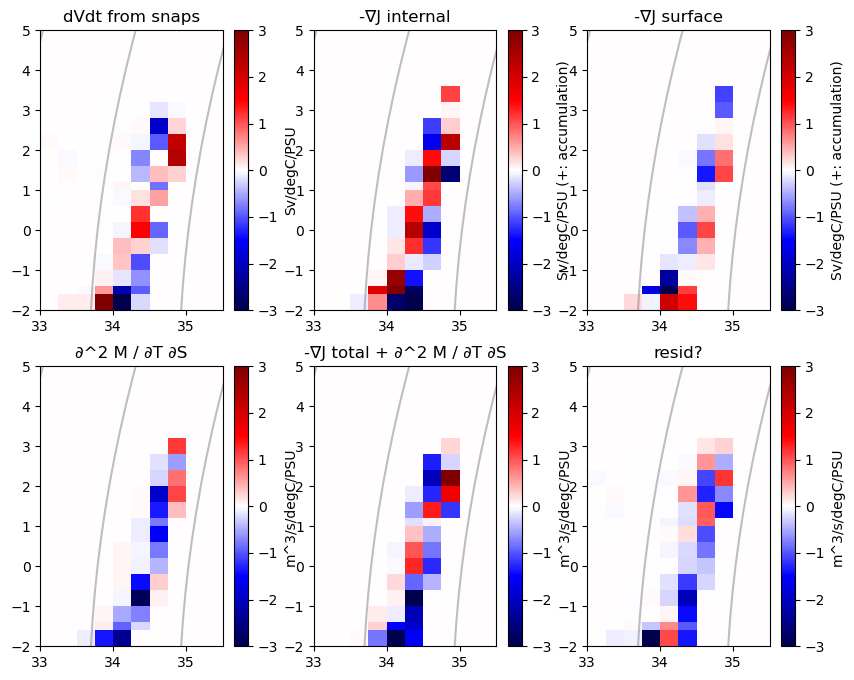

In [160]:
# test this, this is already normalized by dT and dS
fig = plt.figure(figsize = (10,8))

ax = plt.subplot(231)
a = dVdt*1e-6
cb = ax.pcolormesh(Sbin,Tbin,dVdt*1e-6,cmap="seismic",vmin=-3,vmax=3)
# cb = ax.pcolormesh(Sbin,Tbin,np.log10(vol_mesh),cmap="viridis",vmin=10,vmax=14)
ax.set_title("dVdt from snaps")
plt.colorbar(cb,label="Sv/degC/PSU")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,5)

ax = plt.subplot(232)
b = -div_J
cb = ax.pcolormesh(Sbin,Tbin,-div_J_int,cmap="seismic",vmin=-3,vmax=3)
ax.set_title("-∇J internal")
plt.colorbar(cb,label="Sv/degC/PSU (+: accumulation)")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,5)

ax = plt.subplot(233)
b = -div_J
cb = ax.pcolormesh(Sbin,Tbin,-div_J_surf,cmap="seismic",vmin=-3,vmax=3)
ax.set_title("-∇J surface")
plt.colorbar(cb,label="Sv/degC/PSU (+: accumulation)")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_xlim(33,35.5)
ax.set_ylim(-2,5)

ax = plt.subplot(234)
c = total_transport
cb = ax.pcolormesh(Sbin, Tbin, total_transport, cmap='seismic', vmin=-3, vmax=3)
ax.set_xlim(33, 35.5)
ax.set_ylim(-2, 5)
plt.colorbar(cb, ax=ax, label="m^3/s/degC/PSU")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_title("∂^2 M / ∂T ∂S")

ax = plt.subplot(235)
c = total_transport
cb = ax.pcolormesh(Sbin, Tbin, b + c, cmap='seismic', vmin=-3, vmax=3)
ax.set_xlim(33, 35.5)
ax.set_ylim(-2, 5)
plt.colorbar(cb, ax=ax, label="m^3/s/degC/PSU")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_title("-∇J total + ∂^2 M / ∂T ∂S")

ax = plt.subplot(236)
c = total_transport
cb = ax.pcolormesh(Sbin, Tbin, b + c - dVdt*1e-6, cmap='seismic', vmin=-3, vmax=3)
ax.set_xlim(33, 35.5)
ax.set_ylim(-2, 5)
plt.colorbar(cb, ax=ax, label="m^3/s/degC/PSU")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_title("resid?")

# OLD - plot these in either T or S but maybe save this for later or don't do

T needs to be normalized by binwidthT and S needs to be normalized by binwidthS

In [84]:
# plot these on two plots (one for T and one for S)
# create the lines
M_T = np.zeros((4,nT))  # create the array for each
for i in range(4):
    M_T[i] = np.nansum(distr[i]*1e-6,axis=0) / binwidthT       # m^3/degC

M_S = np.zeros((4,nS))  # create the array for each
for i in range(4):
    M_S[i] = np.nansum(distr[i]*1e-6,axis=1) / binwidthS       # m^3/PSU

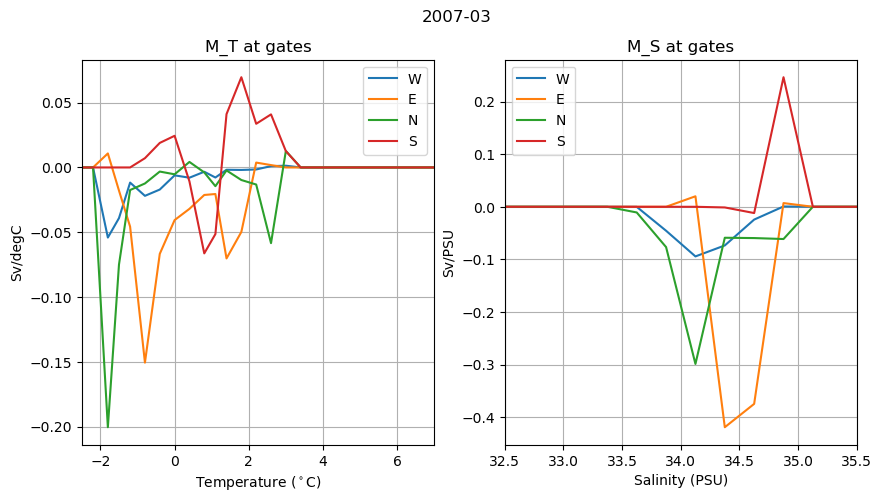

In [94]:
labels = np.array(["W","E","N","S"])

fig = plt.figure(figsize = (10,5))

ax = plt.subplot(121)
for i in {0,1,2,3}:
    ax.plot(binmidT,M_T[i],label=labels[i])
# ax.plot(binmidT,np.nansum(M_T,axis=0),label="sum",alpha=0.3)
ax.set_xlim(-2.5,7)
# ax.set_xlim(-2.3,4)
ax.legend(loc="best")
ax.grid()
ax.set_title("M_T at gates")
ax.set_ylabel("Sv/degC")
ax.set_xlabel(r"Temperature ($^\circ$C)")

ax = plt.subplot(122)
for i in {0,1,2,3}:
    ax.plot(binmidS,M_S[i],label=labels[i])

# ax.plot(binmidS,np.nansum(M_S,axis=0),label="sum",alpha=0.3)
ax.set_xlim(32.5,35.5)
# ax.set_xlim(33,35.5)
ax.legend(loc="best")
ax.grid()
ax.set_title("M_S at gates")
ax.set_ylabel("Sv/PSU")
ax.set_xlabel(r"Salinity (PSU)")
ax.legend(loc="best")

plt.suptitle(datetimes[0].strftime("%Y-%m"))

plt.subplots_adjust(hspace = 0.5)

# we can plot the total G_T and G_S but this is without the surface term

Text(0.5, 0.98, 'Comparing Gate Volume Flow (M) to Internal Advective Volume Flow (G_adv) at 2007-03')

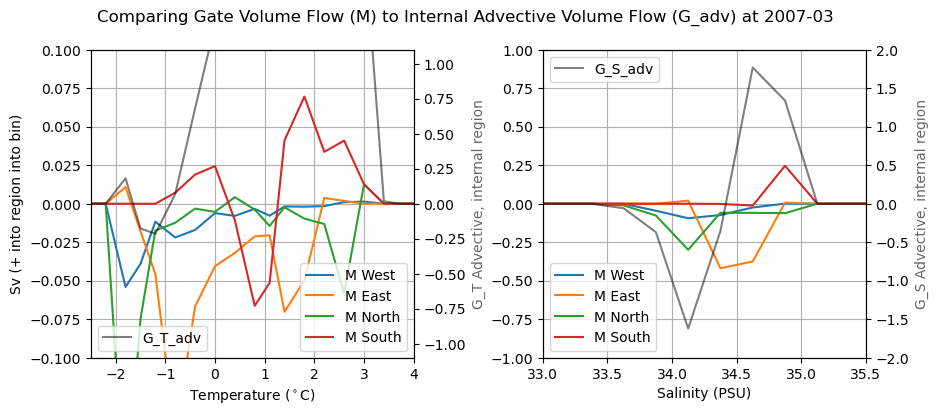

In [93]:
# plot these in comparison to the M_T and M_S terms

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Use subplot indexing

labels = np.array(["M West","M East","M North","M South"])

# M_T at the gates
ax1 = axes[0]
ax2 = ax1.twinx()
for i in range(4):
    ax1.plot(binmidT,M_T[i],label=labels[i])
ax2.plot(binmidT,np.nansum(JtermsT_all[0][1],axis=0),label="G_T_adv",color="black",alpha=.5)
ax1.set_xlim(-2.5,4)
ax1.set_ylim(-.1,.1)
ax1.legend(loc="lower right")
ax1.grid()
# ax1.set_title("M_T")
ax1.set_ylabel("Sv (+ into region into bin)")
ax1.set_xlabel(r"Temperature ($^\circ$C)")
ax2.set_ylabel("G_T Advective, internal region", color="black",alpha=0.6)  # Label for secondary axis
ax2.tick_params(axis='y', labelcolor="black")  # Match label color
ax2.legend(loc="best")
ax2.set_ylim(-1.1,1.1)

# M_S at the gates
ax3 = axes[1]
ax4 = ax3.twinx()
for i in range(4):
    ax3.plot(binmidS,M_S[i],label=labels[i])
ax4.plot(binmidS,np.nansum(JtermsS_all[0][1],axis=1),label="G_S_adv",color="black",alpha=.5)
ax3.set_xlim(33,35.5)
ax3.set_ylim(-1,1)
ax3.legend(loc="best")
ax3.grid()
# ax3.set_title("M_S and G_S_ADV")
ax3.set_xlabel(r"Salinity (PSU)")
ax3.legend(loc="lower left")

ax4.set_ylabel("G_S Advective, internal region", color="black",alpha=0.6)  # Label for secondary axis
ax4.legend(loc="best")
ax4.tick_params(axis='y', labelcolor="black")  # Match label color
ax4.set_ylim(-2,2)


plt.subplots_adjust(hspace=0.8, wspace=0.4)  # Adjust spacing


plt.subplots_adjust(hspace = 0.8)

plt.suptitle("Comparing Gate Volume Flow (M) to Internal Advective Volume Flow (G_adv) at " + datetimes[0].strftime("%Y-%m"))

# plt.savefig("/home/mmurakami/crios_backups/ASTE_270/Pemberton_BarentsSpaper/ASTE_figs/figs/March2007_compare.png",dpi=300)

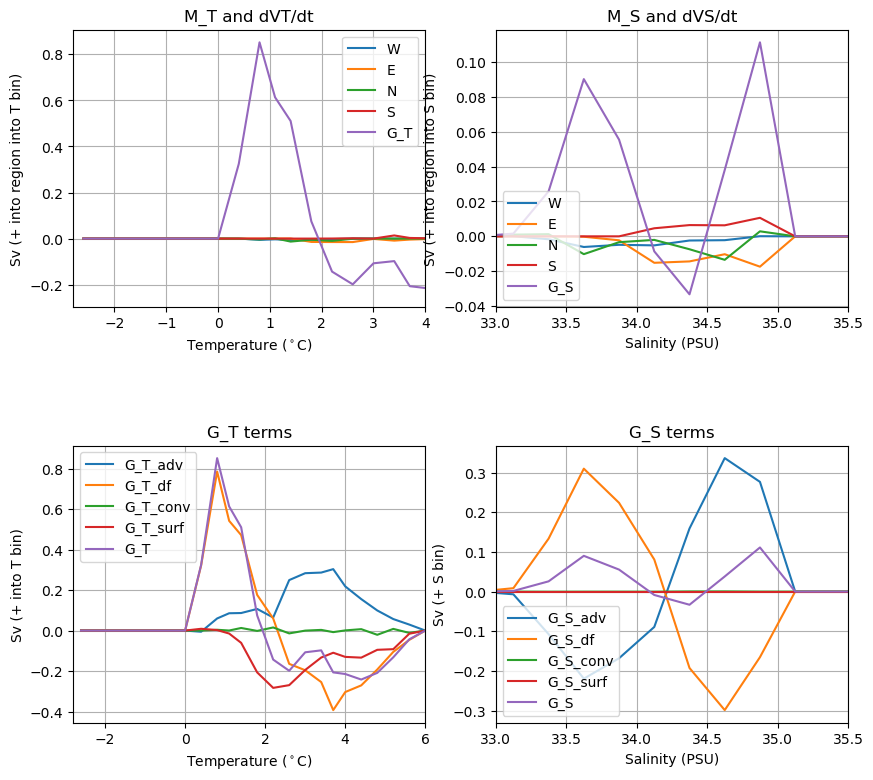

In [32]:
# let's plot all the G terms on one to see, maybe I'm not understanding this

fig = plt.figure(figsize = (10,9))


labels = np.array(["W","E","N","S"])

# M_T at the gates
ax = plt.subplot(221)
for i in range(4):
    ax.plot(binmidT,M_T[i],label=labels[i])
data = np.nansum(JtermsT_nn_all[0][0],axis=0) # total tendency
ax.plot(binmidT,data,label="G_T",alpha=1)
ax.set_xlim(-2.8,4)
ax.legend(loc="upper right")
ax.grid()
ax.set_title("M_T and dVT/dt")
ax.set_ylabel("Sv (+ into region into T bin)")
ax.set_xlabel(r"Temperature ($^\circ$C)")

# M_S at the gates
ax = plt.subplot(222)
for i in range(4):
    ax.plot(binmidS,M_S[i],label=labels[i])
data = np.nansum(JtermsS_nn_all[0][0],axis=1)
ax.plot(binmidS,data,label="G_S",alpha=1)
ax.set_xlim(33,35.5)
ax.legend(loc="upper left")
ax.grid()
ax.set_title("M_S and dVS/dt")
ax.set_ylabel("Sv (+ into region into S bin)")
ax.set_xlabel(r"Salinity (PSU)")
ax.legend(loc="lower left")


# M_T at the gates
ax = plt.subplot(223)
ax.plot(binmidT,np.nansum(JtermsT_nn_all[0][1],axis=0),label="G_T_adv",alpha=1)
ax.plot(binmidT,np.nansum(JtermsT_nn_all[0][2],axis=0),label="G_T_df",alpha=1)
ax.plot(binmidT,np.nansum(JtermsT_nn_all[0][3],axis=0),label="G_T_conv",alpha=1)
ax.plot(binmidT,np.nansum(JtermsT_nn_all[0][4],axis=0),label="G_T_surf",alpha=1)
ax.plot(binmidT,np.nansum(JtermsT_nn_all[0][0],axis=0),label="G_T",alpha=1)

ax.set_xlim(-2.8,6)
ax.legend(loc="upper left")
ax.grid()
ax.set_title("G_T terms")
ax.set_ylabel("Sv (+ into T bin)")
ax.set_xlabel(r"Temperature ($^\circ$C)")

# M_S at the gates
ax = plt.subplot(224)
ax.plot(binmidS,np.nansum(JtermsS_nn_all[0][1],axis=1),label="G_S_adv",alpha=1)
ax.plot(binmidS,np.nansum(JtermsS_nn_all[0][2],axis=1),label="G_S_df",alpha=1)
ax.plot(binmidS,np.nansum(JtermsS_nn_all[0][3],axis=1),label="G_S_conv",alpha=1)
ax.plot(binmidS,np.nansum(JtermsS_nn_all[0][4],axis=1),label="G_S_surf",alpha=1)
ax.plot(binmidS,np.nansum(JtermsS_nn_all[0][0],axis=1),label="G_S",alpha=1)

ax.set_xlim(33,35.5)
ax.legend(loc="upper left")
ax.grid()
ax.set_title("G_S terms")
ax.set_ylabel("Sv (+ S bin)")
ax.set_xlabel(r"Salinity (PSU)")
ax.legend(loc="lower left")

plt.subplots_adjust(hspace = 0.5)